In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [22]:
df = pd.read_csv('tshark.csv')

In [23]:
df_network_out = df[df['src'] == '172.17.20.237']
df_network_in = df[df['src'] == '172.17.20.229']

In [24]:
network_out = df_network_out['timestamp'].to_numpy(int)
network_out_packet_sizes = df_network_out['val'].to_numpy(int)

In [25]:
network_out_next = np.roll(network_out, -1)

In [26]:
diffs_micro = (network_out_next - network_out) / 1000
diffs_micro_tmp = diffs_micro[1:-1]

In [27]:
bins = list(range(0, 1000, 50))

([<matplotlib.axis.XTick at 0x7f936cc6f9d0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

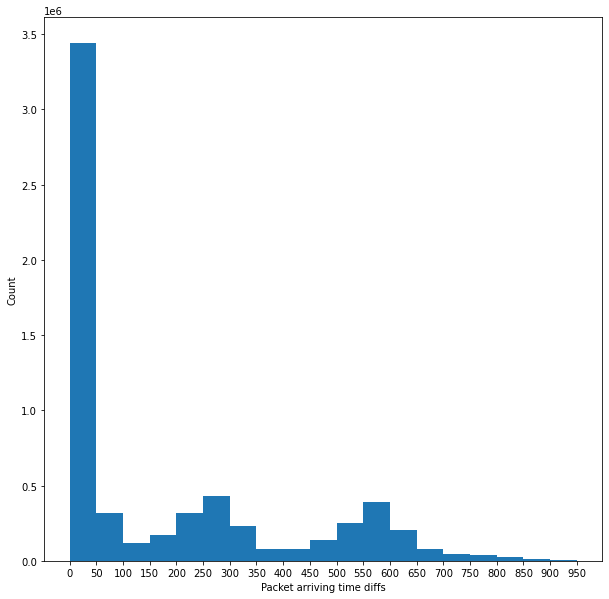

In [28]:
plt.figure(figsize=(10, 10))
plt.hist(diffs_micro_tmp, bins=bins)
plt.ylabel('Count')
plt.xlabel('Packet arriving time diffs')
plt.xticks(bins)

In [29]:
TIME_DELTA = 500
MICRO_TO_NANO = 1000
TIME_DELTA_NANO = TIME_DELTA * MICRO_TO_NANO

In [30]:
flows = []
diffs_high = np.argwhere(diffs_micro > TIME_DELTA).squeeze()
diffs_high_rolled = np.roll(diffs_high, -1).squeeze()
flows = list(zip(diffs_high, diffs_high_rolled))[:-1]
flows_times = [(network_out[f[0]], network_out[f[1]]) for f in flows]

In [31]:
flows_sizes = [np.sum(network_out_packet_sizes[slice(*f)]) for f in flows]

Text(0.5, 0, 'Flow Sizes')

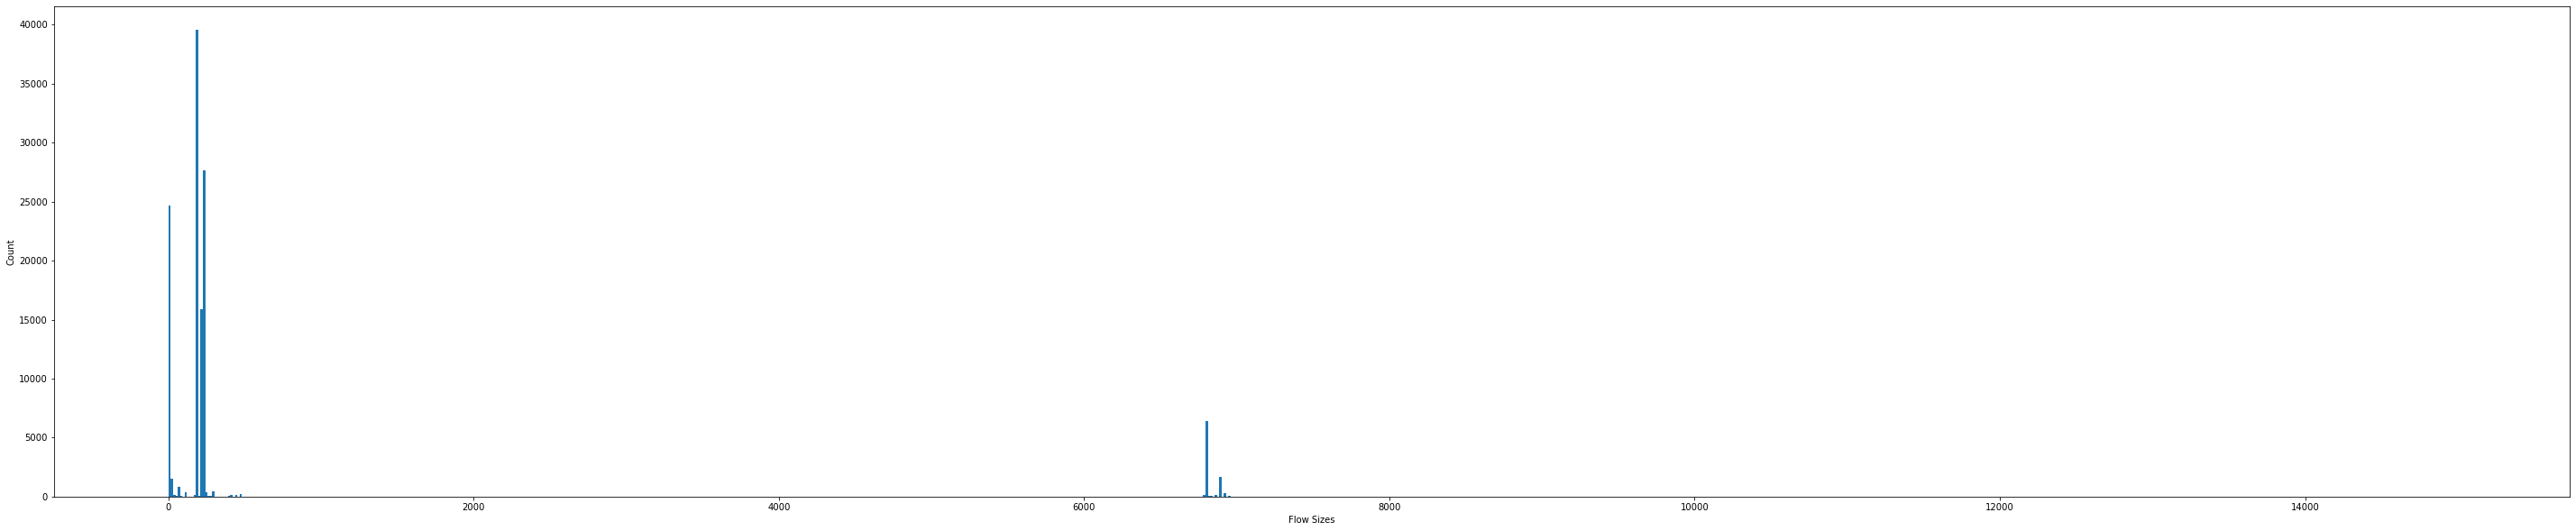

In [32]:
bins = np.arange(0, 15000, 15)
plt.figure(figsize=(50, 10))
plt.hist(flows_sizes, bins=bins)
plt.ylabel('Count')
plt.xlabel('Flow Sizes')

In [33]:
SIZE_THRESHOLD = 75

In [34]:
flows_times = [network_out[f[0]] for f in flows]

In [49]:
data = pd.DataFrame({'time': np.array(flows_times), 'flow_size': np.array(flows_sizes)})

In [58]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.1)
test, validation = train_test_split(test, test_size=0.5)

In [64]:
prefix = 'tshark/data/node-1/train'
train.to_csv(f'nsdi19/{prefix}/flow.csv', index=False)

In [65]:
prefix = 'tshark/data/node-1/test'
test.to_csv(f'nsdi19/{prefix}/flow.csv', index=False)

In [66]:
prefix = 'tshark/data/node-1/validation'
validation.to_csv(f'nsdi19/{prefix}/flow.csv', index=False)